In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS/Exercise_03/genres_v2.csv')
print(data.shape)
data.head()

(42305, 22)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [ ]:
data = data.drop(['song_name', 'Unnamed: 0', 'title'], axis=1)
data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64

No handles with labels found to put in legend.


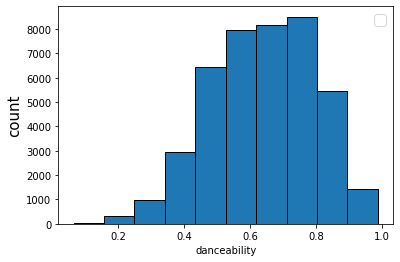

No handles with labels found to put in legend.


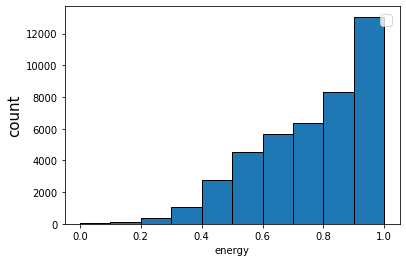

No handles with labels found to put in legend.


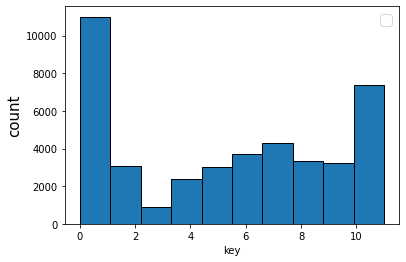

No handles with labels found to put in legend.


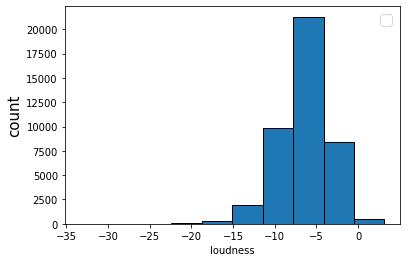

No handles with labels found to put in legend.


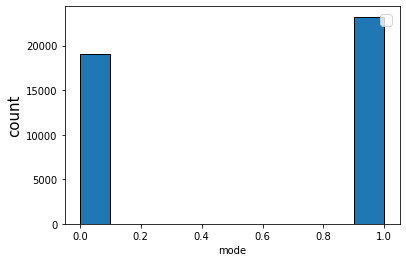

No handles with labels found to put in legend.


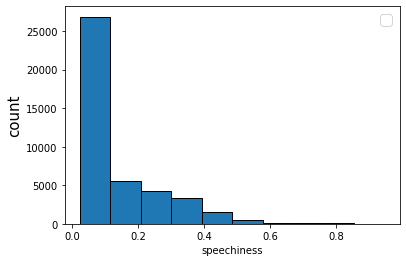

No handles with labels found to put in legend.


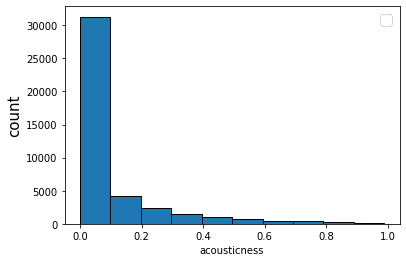

No handles with labels found to put in legend.


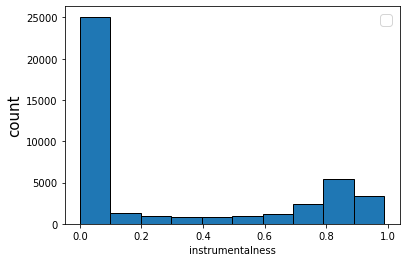

No handles with labels found to put in legend.


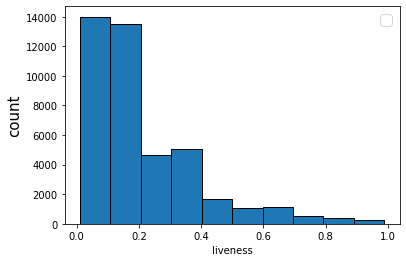

No handles with labels found to put in legend.


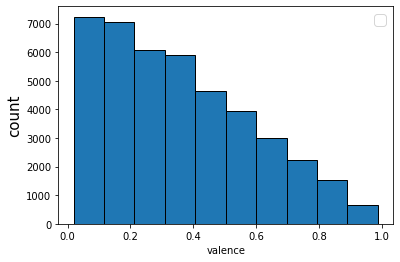

No handles with labels found to put in legend.


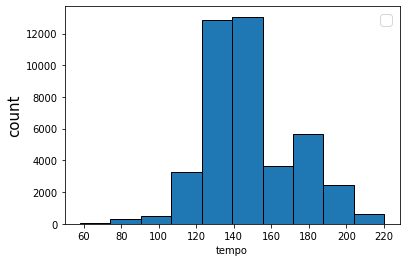

No handles with labels found to put in legend.


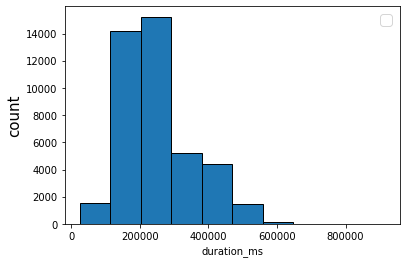

No handles with labels found to put in legend.


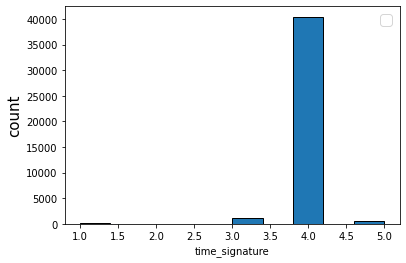

No handles with labels found to put in legend.


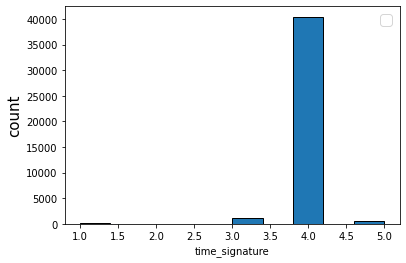

In [ ]:
from scipy import stats

quantitative_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'time_signature']

for column in quantitative_columns:
  x = pd.Series(data[column])
  kde = stats.gaussian_kde(x)
  plt.xlabel(column)
  plt.ylabel('count',fontsize=15)
  plt.hist(x, histtype='bar', ec='black')

  plt.legend(loc='upper right',fontsize=15)
  plt.xticks(fontsize = 10) 
  plt.yticks(fontsize = 10) 
  plt.show() 

In [ ]:
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy import stats

quantitative_df = data.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)
quantitative_df['genre'] = pd.factorize(quantitative_df['genre'])[0]

# Min-max scaling
# df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(quantitative_df), 
#                          columns=quantitative_df.columns)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(quantitative_df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = quantitative_df.columns

# KDE plot
ff.create_distplot([df_scaled[c] for c in df_scaled.columns], 
                    df_scaled.columns, 
                    show_hist=False)

# Radar plot
df_radar = df_scaled.groupby('genre').mean().reset_index() \
                    .melt(id_vars='genre', var_name="features", value_name="avg") \
                    .sort_values(by=['genre','features']).reset_index(drop=True)

px.line_polar(df_radar, 
              r="avg", 
              theta="features", 
              title='Mean Values of Each Track Features',
              color="genre", 
              line_close=True,
              line_shape='spline',
              range_r=[0, 0.8],
              color_discrete_sequence=px.colors.cyclical.mygbm[:-6])
                    

No handles with labels found to put in legend.


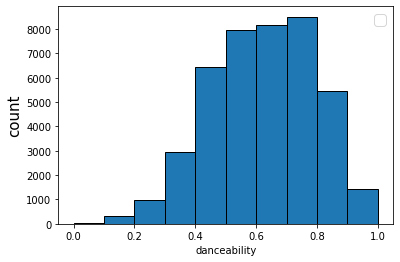

No handles with labels found to put in legend.


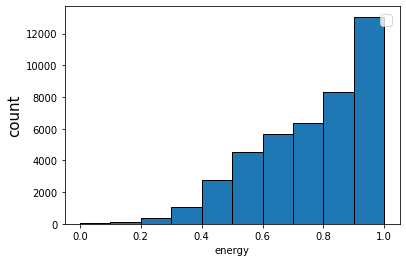

No handles with labels found to put in legend.


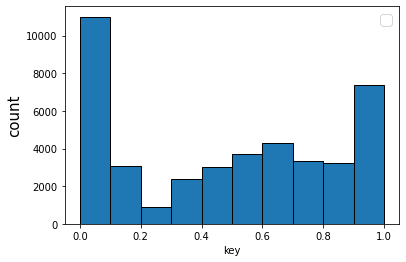

No handles with labels found to put in legend.


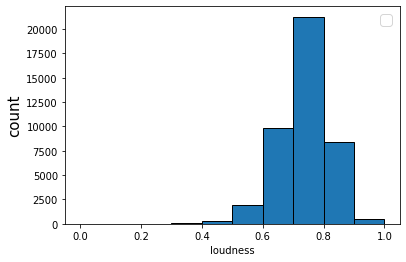

No handles with labels found to put in legend.


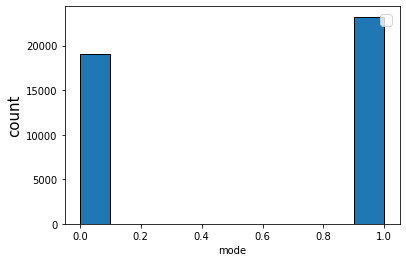

No handles with labels found to put in legend.


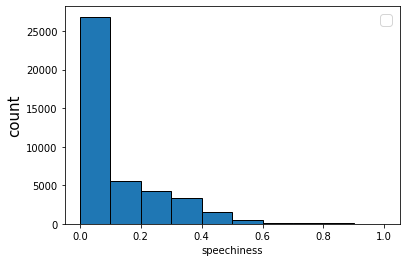

No handles with labels found to put in legend.


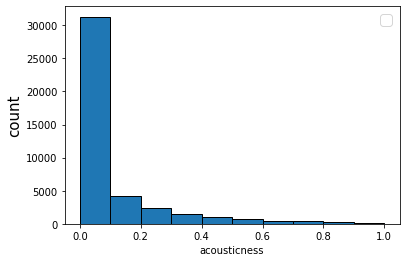

No handles with labels found to put in legend.


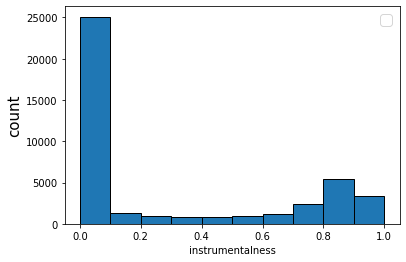

No handles with labels found to put in legend.


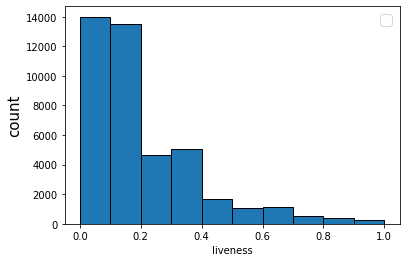

No handles with labels found to put in legend.


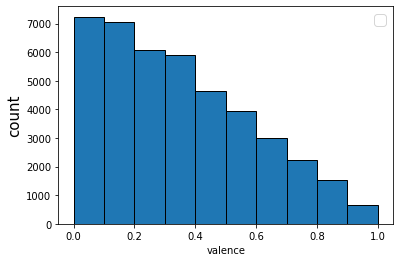

No handles with labels found to put in legend.


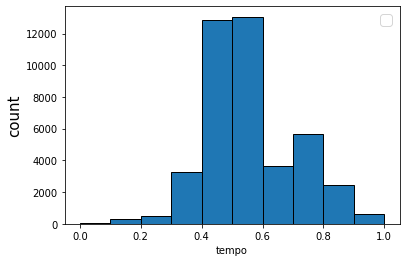

No handles with labels found to put in legend.


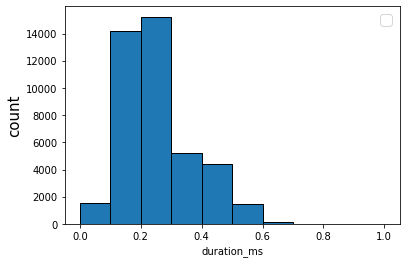

No handles with labels found to put in legend.


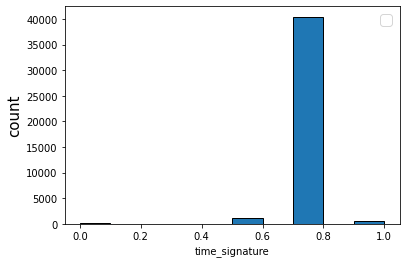

In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

quantitative_df = data.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre'], axis=1)

scaler = MinMaxScaler()
features_normal = scaler.fit_transform(quantitative_df)
features_normal = pd.DataFrame(features_normal)
features_normal.columns = quantitative_df.columns


for column in features_normal.columns:
  x = pd.Series(features_normal[column])
  kde = stats.gaussian_kde(x)
  plt.xlabel(column)
  plt.ylabel('count',fontsize=15)
  plt.hist(x, histtype='bar', ec='black')

  plt.legend(loc='upper right',fontsize=15)
  plt.xticks(fontsize = 10) 
  plt.yticks(fontsize = 10) 
  plt.show() 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tqdm
import matplotlib.pyplot as plt

perm = ['energy', 'loudness', 'key', 'liveness', 'mode', 'danceability', 'speechiness', 'valence', 'tempo', 'instrumentalness', 'acousticness']

def clean(df, cols):
  cleaned_df = df[list(cols)]
  scaled_df = StandardScaler().fit_transform(cleaned_df)
  return scaled_df


def kmeans_fit(x, n):
  kmeans = KMeans(
      init="random",
      n_clusters=n
  )
  kmeans.fit(x)
  labels = kmeans.labels_
  return (n, silhouette_score(x, labels), kmeans.inertia_)

print(str(perm))
cleaned_df = clean(data, perm)
res = []
r = range(4, 11)
for i in tqdm.tqdm(r):
  res.append(kmeans_fit(cleaned_df, i))

plt.style.use("fivethirtyeight")
plt.plot(r, list(zip(*res))[1])
plt.xticks(r)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show() 
res = sorted(res, key=lambda x : x[1])
print(res)

In [ ]:
from itertools import permutations

selected_cols = ['energy', 'loudness', 'speechiness', 'valence', 'tempo', 'instrumentalness', 'acousticness']

perms2 = list(set(map(lambda x: tuple(sorted(x)), permutations(selected_cols, 3))))
perms2p = list(set(map(lambda x: tuple(sorted(x)), permutations(selected_cols, 4))))
perms = [*perms2, *perms2p]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tqdm
import matplotlib.pyplot as plt

def clean(df, cols):
  cleaned_df = df[list(cols)]
  scaled_df = StandardScaler().fit_transform(cleaned_df)
  return scaled_df


def kmeans_fit(x, n):
  kmeans = KMeans(
      init="random",
      n_clusters=n
  )
  kmeans.fit(x)
  labels = kmeans.labels_
  return (n, silhouette_score(x, labels), kmeans.inertia_)

for i, perm in enumerate(perms):
  print("[%d/%d] %s" % (i + 1, len(perms), str(perm)))
  cleaned_df = clean(data, perm)
  res = []
  r = range(4, 11)
  for i in tqdm.tqdm(r):
    res.append(kmeans_fit(cleaned_df, i))

  plt.style.use("fivethirtyeight")
  plt.plot(r, list(zip(*res))[1])
  plt.xticks(r)
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Coefficient")
  plt.show() 
  res = sorted(res, key=lambda x : x[1])
  print(res)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

best_cols = ['instrumentalness', 'speechiness', 'acousticness']
best_n = 7
best_df = data[best_cols]
scaler = StandardScaler()
best_df = scaler.fit_transform(best_df)
kmeans = KMeans(
    init="random",
    n_clusters=best_n,
    max_iter=700
)
kmeans.fit(best_df)
labels = kmeans.labels_
silhouette_score(best_df, labels)

0.5211631708319145

In [ ]:
from pickle import dump
dump(scaler, open("/content/drive/MyDrive/Colab Notebooks/FDS/Exercise_03/scaler.pkl", "wb"))
dump(kmeans, open("/content/drive/MyDrive/Colab Notebooks/FDS/Exercise_03/kmeans.pkl", "wb"))


In [ ]:
!pip install -q ipympl

In [ ]:
import numpy as np

%matplotlib widget

import matplotlib.pyplot as plt

data["Cluster"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(data['instrumentalness'])
y = np.array(data['speechiness'])
z = np.array(data['acousticness'])

ax.scatter(x,y,z, marker="s", c=data["Cluster"], s=40, cmap="RdBu")

plt.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
import json

# df1 = data[data['song_name'].notna()]
x = scaler.transform(data[best_cols])
cluster_result = kmeans.transform(x)

hot_tracks = dict()
for i in range(7):
  ind = np.argsort(cluster_result[:, i])[::][:25]
  hot_tracks[i] = data.iloc[ind]["id"].tolist()

json.dump(hot_tracks, open("/content/drive/MyDrive/Colab Notebooks/FDS/Exercise_03/hot_tracks.json", "w"))